# 🚀 MLflow Quickstart Tutorial

Bienvenido a este tutorial interactivo de MLflow! Al completarlo, sabrás cómo trackear experimentos de ML como un profesional.

---

## 📚 Tabla de Contenidos

0. **Instalación y Prerequisitos** - Setup de MLflow y dependencias
1. **¿Qué es MLflow?** - Conceptos y motivación
2. **Setup del Ambiente** - Configuración de entornos
3. **Conceptos Fundamentales** - Params, Metrics, Artifacts
4. **Ejemplo 1: Hello MLflow** - Tu primer experimento (5 líneas)
5. **Ejemplo 2: Comparando Experimentos** - El poder del tracking
6. **Ejemplo 3: Artifacts y Visualizaciones** - Guardar gráficas y archivos
6. **Model Registry** - Versionado y gestión del lifecycle
7. **Logging Avanzado** - Autolog, logging iterativo, datasets
8. **Best Practices** - Mejores prácticas y features avanzadas
9. **Ejercicios Prácticos** - ¡Ahora tú!
10. **Troubleshooting** - Solución a problemas comunes
11. **Próximos Pasos** - Conclusión y recursos

---

## 🎯 ¿Qué es MLflow?

**MLflow** es una plataforma open-source para gestionar el ciclo de vida completo de Machine Learning.

### El Problema Sin MLflow

Imagina que estás entrenando modelos:
```python
# Experimento 1 (¿cuáles fueron los parámetros?)
model = RandomForest(n_estimators=100, max_depth=5)
# accuracy: 0.87 (¿o era 0.85? ¿dónde guardé eso?)

# Experimento 2 (¿qué cambió?)
model = RandomForest(n_estimators=200, max_depth=10)
# accuracy: ??? (olvidé guardar el resultado...)
```

**Problemas:**
- ❌ No sabes qué parámetros dieron el mejor resultado
- ❌ Pierdes tiempo buscando en notebooks viejos
- ❌ No puedes reproducir experimentos pasados
- ❌ Difícil comparar múltiples modelos
- ❌ No hay registro de qué modelo está en producción

### La Solución: MLflow

MLflow trackea **automáticamente**:
- ✅ **Parámetros** (hiperparámetros del modelo)
- ✅ **Métricas** (accuracy, loss, etc.)
- ✅ **Artefactos** (modelos, gráficas, datasets)
- ✅ **Código** (versión, git commit)
- ✅ **Metadata** (fecha, duración, usuario)

```
┌─────────────────────────────────────────────────────┐
│               MLflow Tracking Server                │
├─────────────────────────────────────────────────────┤
│  Experiment: iris-classification                    │
│                                                      │
│  Run 1: n_estimators=100  →  accuracy=0.87         │
│  Run 2: n_estimators=200  →  accuracy=0.92  ⭐     │
│  Run 3: n_estimators=50   →  accuracy=0.85         │
│                                                      │
│  [Gráficas] [Modelos] [Comparación] [Reproducir]   │
└─────────────────────────────────────────────────────┘
```

---

## 🏗️ Dos Ambientes de MLflow en Este Proyecto

Este proyecto usa **dos ambientes separados**:

### 1️⃣ Quickstart (`mlflow/quickstart/`) — **Este Notebook**
| Característica | Valor |
|---------------|-------|
| **Propósito** | Aprendizaje y experimentación |
| **Ubicación** | `mlflow/quickstart/` |
| **¿Seguro resetear?** | ✅ Sí! Eliminar cuando quieras |
| **En git?** | ❌ No (completamente ignorado) |
| **Cuándo usar** | Tutoriales, pruebas, learning |

### 2️⃣ Dev (`mlflow/dev/`) — **Para Desarrollo Real**
| Característica | Valor |
|---------------|-------|
| **Propósito** | Desarrollo y entrenamiento real |
| **Ubicación** | `mlflow/dev/` |
| **¿Seguro resetear?** | ⚠️ No - contiene experimentos reales |
| **En git?** | 🟡 Parcial (solo metadata) |
| **Cuándo usar** | Entrenar modelos del proyecto |

**💡 Tip:** Hoy usaremos el ambiente quickstart. Puedes borrar todo al final sin consecuencias.

---

## 🎓 ¿Qué Aprenderás?

Al final de este tutorial podrás:
- [x] Entender qué es MLflow y por qué es útil
- [ ] Instalar MLflow y sus dependencias
- [ ] Crear y trackear tu primer experimento
- [ ] Comparar múltiples runs para encontrar el mejor modelo
- [ ] Guardar visualizaciones y artefactos
- [ ] Implementar un pipeline ML completo con tracking
- [ ] Usar el Model Registry para versionar modelos
- [ ] Gestionar el lifecycle de modelos con aliases (champion/challenger)
- [ ] Usar autologging y logging avanzado (iterativo, datasets)
- [ ] Acceder al MLflow UI para explorar experimentos

---

## 🔄 Resetear Este Ambiente

Si quieres empezar desde cero en cualquier momento:
```bash
rm -rf mlops-project/mlflow/quickstart/
```
Se recreará automáticamente cuando ejecutes este notebook nuevamente.

# 0. Instalación y Prerequisitos 📦

Antes de empezar, necesitamos instalar MLflow y sus dependencias.

## 🐍 Requisitos del Sistema

- **Python 3.10** (requisito de este proyecto)
- **pip** (gestor de paquetes de Python)

## 📚 ¿Qué vamos a instalar?

Este tutorial requiere los siguientes paquetes:

| Paquete | Versión | Propósito |
|---------|---------|-----------|
| **mlflow** | Latest | Tracking de experimentos y model registry |
| **scikit-learn** | Latest | Machine Learning (modelos, métricas) |
| **pandas** | Latest | Análisis y manipulación de datos |
| **matplotlib** | Latest | Visualizaciones y gráficas |
| **numpy** | Latest | Operaciones numéricas |

**💡 Nota:** Si ya instalaste las dependencias del proyecto con `make requirements`, ya tienes todo lo necesario.

## 🔧 Paso 1: Crear y Activar Ambiente Virtual (Recomendado)

**¿Por qué usar un ambiente virtual?**
- ✅ Aísla las dependencias de este proyecto
- ✅ Evita conflictos con otros proyectos Python
- ✅ Facilita la reproducibilidad
- ✅ No requiere permisos de administrador

**💡 Importante:** Si ya estás en un ambiente virtual activado (ves `(.venv)` o similar en tu terminal), puedes saltar esta celda.

In [1]:
# Verificar y crear ambiente virtual
import sys
import os
from pathlib import Path

print("🔍 Verificando ambiente de Python...\n")

# Verificar si ya estamos en un ambiente virtual
in_venv = hasattr(sys, 'real_prefix') or (
    hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix
)

if in_venv:
    print("✅ Ya estás en un ambiente virtual!")
    print(f"📍 Ambiente activo: {sys.prefix}")
    print(f"🐍 Python version: {sys.version.split()[0]}")
else:
    print("⚠️  No estás en un ambiente virtual.")
    print("\n" + "="*60)
    print("📋 Para crear y activar un ambiente virtual, ejecuta estos")
    print("   comandos en tu TERMINAL (no en este notebook):")
    print("="*60)
    print("\n# 1️⃣  Navega al directorio del proyecto:")
    print("cd mlops-project")
    print("\n# 2️⃣  Crea el ambiente virtual:")
    print("python -m venv .venv")
    print("\n# 3️⃣  Activa el ambiente virtual:")
    print("\n   En Linux/Mac:")
    print("   source .venv/bin/activate")
    print("\n   En Windows:")
    print("   .venv\\Scripts\\activate")
    print("\n# 4️⃣  Verifica la activación (deberías ver '(.venv)' en tu prompt)")
    print("\n# 5️⃣  Luego vuelve a abrir este notebook en el ambiente activado")
    print("="*60)
    print("\n💡 Alternativamente, si usas VSCode/Jupyter, selecciona")
    print("   el kernel de Python del ambiente virtual (.venv)")

print("\n" + "="*60)

🔍 Verificando ambiente de Python...

⚠️  No estás en un ambiente virtual.

📋 Para crear y activar un ambiente virtual, ejecuta estos
   comandos en tu TERMINAL (no en este notebook):

# 1️⃣  Navega al directorio del proyecto:
cd mlops-project

# 2️⃣  Crea el ambiente virtual:
python -m venv .venv

# 3️⃣  Activa el ambiente virtual:

   En Linux/Mac:
   source .venv/bin/activate

   En Windows:
   .venv\Scripts\activate

# 4️⃣  Verifica la activación (deberías ver '(.venv)' en tu prompt)

# 5️⃣  Luego vuelve a abrir este notebook en el ambiente activado

💡 Alternativamente, si usas VSCode/Jupyter, selecciona
   el kernel de Python del ambiente virtual (.venv)



## 📥 Paso 2: Instalar Dependencias

Una vez que tengas el ambiente virtual activado (o si decides no usarlo), instala las dependencias necesarias.

In [2]:
# Opción A: Instalar paquetes individuales (recomendado para este tutorial)
# Descomenta la siguiente línea si necesitas instalar:
# !pip install mlflow scikit-learn pandas matplotlib numpy

# Opción B: Usar requirements.txt del proyecto completo
# Descomenta si quieres instalar TODAS las dependencias del proyecto:
# !pip install -r ../requirements.txt

print("⏭️  Celda de instalación lista.")
print("\n💡 Opciones:")
print("   A) Descomenta la línea con 'pip install mlflow...' para instalar lo mínimo")
print("   B) Descomenta la línea con 'pip install -r...' para instalar todo el proyecto")
print("\n✅ Si ya tienes todo instalado, continúa a la siguiente celda para verificar.")

⏭️  Celda de instalación lista.

💡 Opciones:
   A) Descomenta la línea con 'pip install mlflow...' para instalar lo mínimo
   B) Descomenta la línea con 'pip install -r...' para instalar todo el proyecto

✅ Si ya tienes todo instalado, continúa a la siguiente celda para verificar.


## ✅ Paso 3: Verificar Instalación

Ejecuta esta celda para confirmar que todos los paquetes están correctamente instalados.

In [3]:
# Verificar que todas las dependencias están instaladas correctamente
import sys

print("🔍 Verificando instalación de paquetes...\n")
print(f"Python version: {sys.version.split()[0]}")

packages_ok = True

# Verificar cada paquete
packages = {
    'mlflow': 'MLflow',
    'sklearn': 'scikit-learn',
    'pandas': 'Pandas',
    'matplotlib': 'Matplotlib',
    'numpy': 'NumPy'
}

for module, name in packages.items():
    try:
        if module == 'sklearn':
            import sklearn
            version = sklearn.__version__
        elif module == 'mlflow':
            import mlflow
            version = mlflow.__version__
        elif module == 'pandas':
            import pandas
            version = pandas.__version__
        elif module == 'matplotlib':
            import matplotlib
            version = matplotlib.__version__
        elif module == 'numpy':
            import numpy
            version = numpy.__version__
        
        print(f"✅ {name:15} v{version}")
    except ImportError:
        print(f"❌ {name:15} NOT INSTALLED")
        packages_ok = False

print("\n" + "="*50)
if packages_ok:
    print("🎉 ¡Todas las dependencias están instaladas!")
    print("✅ Estás listo para continuar con el tutorial.")
else:
    print("⚠️  Faltan paquetes por instalar.")
    print("💡 Ejecuta la celda anterior para instalarlos.")
print("="*50)

🔍 Verificando instalación de paquetes...

Python version: 3.12.7
✅ MLflow          v3.5.0
✅ scikit-learn    v1.5.1
✅ Pandas          v2.2.2
✅ Matplotlib      v3.9.2
✅ NumPy           v1.26.4

🎉 ¡Todas las dependencias están instaladas!
✅ Estás listo para continuar con el tutorial.


## 💡 Notas Adicionales

### Opción 1: Usar el requirements.txt del Proyecto

Si estás trabajando en el proyecto completo, usa el archivo `requirements.txt`:

```bash
# Desde el directorio mlops-project/
pip install -r requirements.txt
```

Esto instalará todas las dependencias del proyecto, incluyendo MLflow.

---

### Opción 2: Usar un Entorno Virtual (Recomendado)

Para aislar las dependencias de este proyecto:

```bash
# Crear entorno virtual
python -m venv .venv

# Activar (Linux/Mac)
source .venv/bin/activate

# Activar (Windows)
.venv\Scripts\activate

# Instalar dependencias
pip install mlflow scikit-learn pandas matplotlib numpy
```

**💡 Ventaja:** No afecta otros proyectos Python en tu sistema.

---

### Opción 3: Usar make (Si está disponible)

El proyecto tiene un Makefile con comandos útiles:

```bash
# Instalar todas las dependencias
make requirements

# Ver otros comandos disponibles
make help
```

---

### 🐛 Troubleshooting de Instalación

**Problema: "pip no encontrado"**
```bash
# Instalar pip primero
python -m ensurepip --upgrade
```

**Problema: "Permission denied"**
```bash
# Instalar solo para tu usuario (sin sudo)
pip install --user mlflow scikit-learn pandas matplotlib numpy
```

**Problema: "Versión de Python incorrecta"**
```bash
# Verificar versión de Python
python --version

# Debe ser Python 3.10.x
```

---

✅ **Una vez verificado que todo está instalado, continúa con la siguiente sección!**

# 1. Setup del Ambiente 🔧

Primero configuramos el ambiente quickstart de MLflow.

In [4]:
# Configuración del ambiente quickstart
import sys
sys.path.insert(0, '..')

from mlops_online_news_popularity.config import MLFLOW_QUICKSTART_URI, MLFLOW_DEV_URI
import mlflow

# Configurar tracking URI para el ambiente quickstart
mlflow.set_tracking_uri(MLFLOW_QUICKSTART_URI)

print("✅ MLflow configurado correctamente!")
print(f"📍 Tracking URI: {MLFLOW_QUICKSTART_URI}")
print(f"\n🎯 Usando ambiente: QUICKSTART (seguro para experimentar)")
print(f"🏗️  Ambiente DEV (para producción): {MLFLOW_DEV_URI}")

2025-10-17 00:13:02.412 | INFO     | mlops_online_news_popularity.config:<module>:11 - PROJ_ROOT path is: /Users/artemiopadilla/Documents/repos/GitHub/tec/mlops-project/mlops-project


✅ MLflow configurado correctamente!
📍 Tracking URI: sqlite:////Users/artemiopadilla/Documents/repos/GitHub/tec/mlops-project/mlops-project/mlflow/quickstart/mlflow.db

🎯 Usando ambiente: QUICKSTART (seguro para experimentar)
🏗️  Ambiente DEV (para producción): sqlite:////Users/artemiopadilla/Documents/repos/GitHub/tec/mlops-project/mlops-project/mlflow/dev/mlflow.db


# 2. Conceptos Fundamentales 📖

Antes de empezar a codear, entendamos los 3 componentes principales de MLflow Tracking:

---

## 🎯 1. Parameters (Parámetros)

**¿Qué son?** Configuraciones que NO cambian durante el entrenamiento.

**Ejemplos:**
- Hiperparámetros del modelo: `n_estimators=100`, `learning_rate=0.01`
- Configuración del dataset: `train_size=0.8`, `random_state=42`
- Arquitectura: `num_layers=3`, `dropout=0.2`

```python
mlflow.log_param("n_estimators", 100)
mlflow.log_param("max_depth", 5)
```

**💡 Tip:** Usa params para TODO lo que defines ANTES de entrenar.

---

## 📊 2. Metrics (Métricas)

**¿Qué son?** Valores que miden el rendimiento del modelo.

**Ejemplos:**
- Métricas finales: `accuracy=0.95`, `f1_score=0.87`
- Métricas por época: `train_loss`, `val_loss`
- Métricas de negocio: `conversion_rate`, `revenue`

```python
mlflow.log_metric("accuracy", 0.95)
mlflow.log_metric("f1_score", 0.87)

# Para métricas que cambian por época:
for epoch in range(10):
    mlflow.log_metric("loss", loss_value, step=epoch)
```

**💡 Tip:** Puedes loguear la misma métrica múltiples veces con diferentes `step`.

---

## 📦 3. Artifacts (Artefactos)

**¿Qué son?** Archivos que quieres guardar (modelos, gráficas, datasets, etc.)

**Ejemplos:**
- Modelos entrenados: `model.pkl`, `model.h5`
- Visualizaciones: `confusion_matrix.png`, `feature_importance.png`
- Datos: `predictions.csv`, `dataset_sample.csv`
- Reportes: `training_report.txt`, `metrics_summary.json`

```python
# Guardar un archivo individual
mlflow.log_artifact("confusion_matrix.png")

# Guardar un directorio completo
mlflow.log_artifacts("outputs/")

# Guardar un modelo
mlflow.sklearn.log_model(model, "model")
```

---

## 🔄 Anatomía de un Experimento MLflow

```
Experiment (Proyecto)
  ├── Run 1 (Experimento individual)
  │     ├── Parameters: {n_estimators: 100, max_depth: 5}
  │     ├── Metrics: {accuracy: 0.87, f1: 0.85}
  │     └── Artifacts: [model.pkl, confusion_matrix.png]
  │
  ├── Run 2
  │     ├── Parameters: {n_estimators: 200, max_depth: 10}
  │     ├── Metrics: {accuracy: 0.92, f1: 0.90}
  │     └── Artifacts: [model.pkl, confusion_matrix.png]
  │
  └── Run 3
        └── ...
```

**Experiment:** Agrupa runs relacionados (ej: "iris-classification")  
**Run:** Un entrenamiento individual con sus params/metrics/artifacts

---

## ✅ Checkpoint de Comprensión

Antes de continuar, asegúrate de entender:

- [ ] ¿Qué son los **parameters** y cuándo usarlos?
- [ ] ¿Qué son las **metrics** y qué diferencia hay con los params?
- [ ] ¿Qué son los **artifacts** y qué tipo de archivos puedo guardar?
- [ ] ¿Cuál es la diferencia entre un **Experiment** y un **Run**?

Si algo no está claro, vuelve a leer esta sección antes de continuar. 👆

# 3. Ejemplo 1: Hello MLflow 👋

## 🎯 Objetivo
Crear tu primer experimento de MLflow en **5 líneas de código**.

Este es el ejemplo más simple posible para que veas cómo funciona el tracking básico.

In [5]:
# Ejemplo más simple: 5 líneas de código
import mlflow

# Crear un experimento y empezar un run
mlflow.set_experiment("hello-mlflow")

with mlflow.start_run(run_name="my-first-run"):
    # Loguear un parámetro
    mlflow.log_param("greeting", "hello")
    
    # Loguear una métrica
    mlflow.log_metric("excitement_level", 100)
    
    print("✅ ¡Tu primer experimento MLflow fue logueado!")

2025/10/17 00:13:02 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/10/17 00:13:02 INFO mlflow.store.db.utils: Updating database tables
2025-10-17 00:13:02 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-10-17 00:13:02 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2025-10-17 00:13:02 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-10-17 00:13:02 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.


✅ ¡Tu primer experimento MLflow fue logueado!


## 📝 ¿Qué acabó de pasar?

1. **`mlflow.set_experiment("hello-mlflow")`** → Creó (o seleccionó) un experimento llamado "hello-mlflow"
2. **`with mlflow.start_run(...)`** → Inició un "run" (experimento individual)  
3. **`log_param(...)`** → Guardó el parámetro `greeting = "hello"`
4. **`log_metric(...)`** → Guardó la métrica `excitement_level = 100`

MLflow automáticamente también guardó:
- ⏰ Timestamp (cuándo se ejecutó)
- 👤 Usuario (quién lo ejecutó)
- 💻 Código fuente y versión
- ⏱️ Duración del run

---

## 🔍 Ver el Experimento en el UI

Abre una terminal y ejecuta:
```bash
cd mlops-project
mlflow ui --backend-store-uri sqlite:///mlflow/quickstart/mlflow.db --port 5000
```

Luego abre en tu navegador: **http://localhost:5000**

Deberías ver:
- Un experimento llamado "hello-mlflow"
- Un run llamado "my-first-run"
- El parámetro y métrica que logueaste

**💡 Tip:** Deja el UI abierto mientras continúas con el tutorial para ver los cambios en tiempo real.

---

## ✅ Checkpoint

¿Qué aprendiste?
- [x] Crear un experimento con `set_experiment()`
- [x] Iniciar un run con `start_run()`
- [x] Loguear parámetros con `log_param()`
- [x] Loguear métricas con `log_metric()`
- [x] Ver experimentos en el MLflow UI

# 4. Ejemplo 2: Comparando Experimentos 🔬

## 🎯 Objetivo
Ver el **verdadero poder de MLflow**: comparar múltiples runs para encontrar el mejor modelo.

Vamos a entrenar el mismo modelo con diferentes hiperparámetros y ver cuál funciona mejor.

In [6]:
# Importar librerías necesarias
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import mlflow

# Crear dataset sintético
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                          n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📊 Dataset: {len(X_train)} training samples, {len(X_test)} test samples")
print(f"🎯 Vamos a entrenar 3 modelos diferentes y compararlos...\n")

📊 Dataset: 800 training samples, 200 test samples
🎯 Vamos a entrenar 3 modelos diferentes y compararlos...



In [7]:
# Configurar experimento
mlflow.set_experiment("model-comparison")

# Diferentes configuraciones de hiperparámetros
configs = [
    {"n_estimators": 10, "max_depth": 3, "name": "Modelo Pequeño"},
    {"n_estimators": 50, "max_depth": 10, "name": "Modelo Mediano"},
    {"n_estimators": 100, "max_depth": None, "name": "Modelo Grande"},
]

results = []

# Entrenar cada configuración
for config in configs:
    # Iniciar un run para cada configuración
    with mlflow.start_run(run_name=config["name"]):
        # 1. Log parameters (hiperparámetros)
        mlflow.log_param("n_estimators", config["n_estimators"])
        mlflow.log_param("max_depth", config["max_depth"])
        
        # 2. Entrenar modelo
        model = RandomForestClassifier(
            n_estimators=config["n_estimators"],
            max_depth=config["max_depth"],
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # 3. Evaluar
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # 4. Log metrics (resultados)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1_score", f1)
        
        # Guardar resultados para mostrar
        results.append({
            "name": config["name"],
            "n_estimators": config["n_estimators"],
            "max_depth": config["max_depth"],
            "accuracy": accuracy,
            "f1_score": f1
        })
        
        print(f"✅ {config['name']}: Accuracy={accuracy:.4f}, F1={f1:.4f}")

print(f"\n{'='*60}")
print("🎉 ¡Todos los modelos entrenados!")

✅ Modelo Pequeño: Accuracy=0.8200, F1=0.8201
✅ Modelo Mediano: Accuracy=0.9100, F1=0.9100
✅ Modelo Grande: Accuracy=0.9000, F1=0.9001

🎉 ¡Todos los modelos entrenados!


In [8]:
# Mostrar comparación de resultados
import pandas as pd

df_results = pd.DataFrame(results)
df_results = df_results.sort_values('accuracy', ascending=False)

print("📊 Resultados Comparados:")
print(df_results.to_string(index=False))

best_model = df_results.iloc[0]
print(f"\n🏆 Mejor Modelo: {best_model['name']}")
print(f"   - Accuracy: {best_model['accuracy']:.4f}")
print(f"   - F1 Score: {best_model['f1_score']:.4f}")

📊 Resultados Comparados:
          name  n_estimators  max_depth  accuracy  f1_score
Modelo Mediano            50       10.0      0.91  0.910000
 Modelo Grande           100        NaN      0.90  0.900080
Modelo Pequeño            10        3.0      0.82  0.820144

🏆 Mejor Modelo: Modelo Mediano
   - Accuracy: 0.9100
   - F1 Score: 0.9100


## 🔍 Búsqueda Programática del Mejor Modelo

En lugar de comparar manualmente, podemos usar **MLflow Client** para buscar el mejor modelo automáticamente.

Esto es especialmente útil cuando tienes cientos de runs y quieres automatizar la selección del mejor modelo.

In [9]:
# Búsqueda programática del mejor modelo
from mlflow.tracking import MlflowClient

client = MlflowClient()

# Obtener el experimento actual
experiment = client.get_experiment_by_name("model-comparison")
experiment_id = experiment.experiment_id

print(f"🔍 Buscando en experimento: {experiment.name}\n")

# Buscar todos los runs, ordenados por accuracy (descendente)
runs = client.search_runs(
    experiment_ids=[experiment_id],
    order_by=["metrics.accuracy DESC"],
    max_results=5
)

print("📊 Top 3 Modelos por Accuracy:")
print("="*70)

for i, run in enumerate(runs[:3], 1):
    run_name = run.data.tags.get("mlflow.runName", "Unknown")
    accuracy = run.data.metrics.get("accuracy", 0)
    f1 = run.data.metrics.get("f1_score", 0)
    n_estimators = run.data.params.get("n_estimators", "N/A")
    max_depth = run.data.params.get("max_depth", "N/A")
    
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉"
    print(f"{medal} #{i}: {run_name}")
    print(f"   Accuracy: {accuracy:.4f} | F1: {f1:.4f}")
    print(f"   Params: n_estimators={n_estimators}, max_depth={max_depth}")
    print(f"   Run ID: {run.info.run_id}")
    print()

# Obtener el mejor run
best_run = runs[0]
best_run_id = best_run.info.run_id
best_accuracy = best_run.data.metrics.get("accuracy")

print("="*70)
print(f"🏆 MEJOR MODELO:")
print(f"   Run ID: {best_run_id}")
print(f"   Accuracy: {best_accuracy:.4f}")
print(f"\n💡 Tip: Puedes usar este run_id para cargar el modelo más adelante!")

🔍 Buscando en experimento: model-comparison

📊 Top 3 Modelos por Accuracy:
🥇 #1: Modelo Mediano
   Accuracy: 0.9100 | F1: 0.9100
   Params: n_estimators=50, max_depth=10
   Run ID: 8b73c1f7b7fd4de2b40f49e57cb32222

🥈 #2: Modelo Mediano
   Accuracy: 0.9100 | F1: 0.9100
   Params: n_estimators=50, max_depth=10
   Run ID: c9786ebb8c5941f082c52b61791ed3b6

🥉 #3: Modelo Mediano
   Accuracy: 0.9100 | F1: 0.9100
   Params: n_estimators=50, max_depth=10
   Run ID: f53ebba232f34a2aaf2abfb1db5d0e82

🏆 MEJOR MODELO:
   Run ID: 8b73c1f7b7fd4de2b40f49e57cb32222
   Accuracy: 0.9100

💡 Tip: Puedes usar este run_id para cargar el modelo más adelante!


## 🎯 El Poder de MLflow: Comparación Visual

Acabas de entrenar 3 modelos diferentes. **Sin MLflow**, tendrías que:
- ❌ Recordar qué parámetros usaste en cada uno
- ❌ Copiar/pegar resultados en una hoja de cálculo
- ❌ Buscar en notebooks viejos cuando quieras reproducir un modelo

**Con MLflow**, todo está automáticamente registrado y organizado! 🎉

---

## 🔍 Comparar en el MLflow UI

Ve al MLflow UI (http://localhost:5000) y haz lo siguiente:

1. **Selecciona el experimento** "model-comparison"
2. **Marca las 3 runs** (checkboxes a la izquierda)
3. **Click en "Compare"** (botón arriba)

Verás:
- 📊 **Gráficas paralelas** comparando parámetros vs métricas
- 📈 **Scatter plots** mostrando relaciones
- 📋 **Tabla comparativa** con todos los valores
- 🔍 **Diferencias resaltadas** entre runs

**💡 Try This:** En el UI, ordena los runs por accuracy (click en la columna). ¿Cuál es el mejor?

---

## ✅ Checkpoint

¿Qué aprendiste?
- [x] Entrenar múltiples modelos con diferentes hiperparámetros
- [x] Loguear parámetros y métricas automáticamente
- [x] Comparar resultados en código (pandas)
- [x] Usar el MLflow UI para comparar visualmente
- [x] Identificar el mejor modelo rápidamente

---

## 🎯 Ejercicio Rápido

**Desafío:** Agrega un 4to modelo con tus propios hiperparámetros:
```python
# Tu turno: ¿Puedes mejorar el accuracy?
# Modifica estos valores:
{"n_estimators": ???, "max_depth": ???, "name": "Mi Modelo Custom"}
```

Tip: Copia el código anterior, agrega tu config al array `configs`, y vuelve a ejecutar.

# 5. Ejemplo 3: Artifacts y Visualizaciones 📊

## 🎯 Objetivo
Aprender a guardar **archivos** junto con tus experimentos: gráficas, modelos, datasets, etc.

Los artifacts son cualquier archivo que quieras asociar con un experimento (imágenes, CSVs, modelos, etc.).

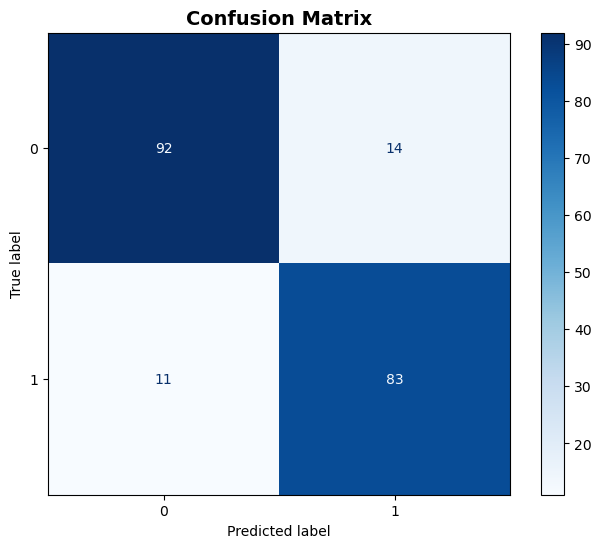

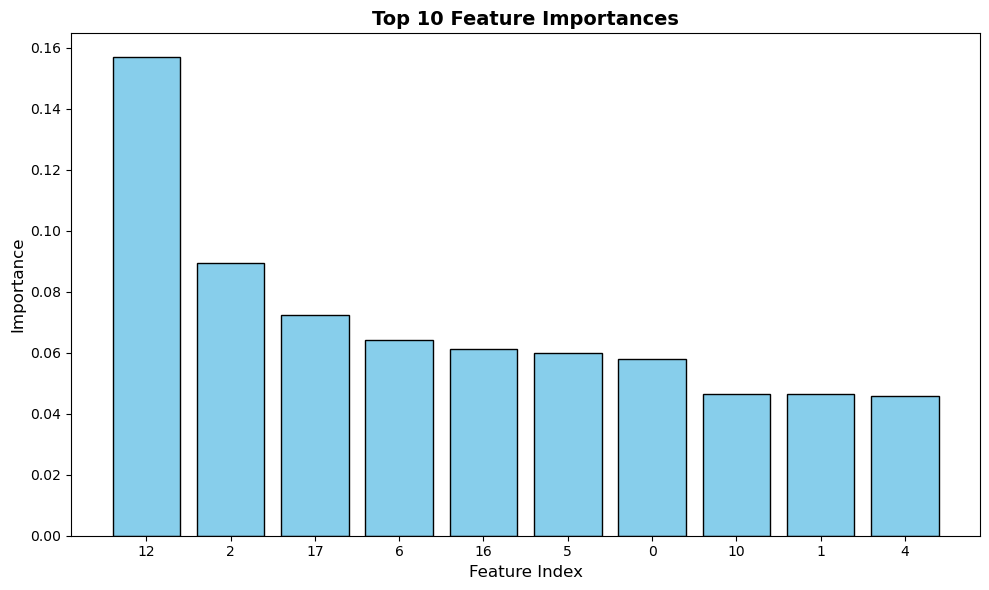

2025/10/17 00:13:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/17 00:13:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Artifacts guardados:
   📊 confusion_matrix.png
   📈 feature_importances.png
   📄 report.txt
   🤖 model (sklearn)


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear directorio para outputs temporales
os.makedirs("outputs", exist_ok=True)

mlflow.set_experiment("artifacts-demo")

with mlflow.start_run(run_name="visualizations-example"):
    # Entrenar un modelo rápido
    model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Log params and metrics
    mlflow.log_param("n_estimators", 50)
    mlflow.log_param("max_depth", 5)
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    
    # === 1. Guardar Confusion Matrix ===
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues')
    plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
    plt.savefig("outputs/confusion_matrix.png", dpi=150, bbox_inches='tight')
    mlflow.log_artifact("outputs/confusion_matrix.png")
    plt.show()  # Mostrar en el notebook
    plt.close()
    
    # === 2. Guardar Feature Importances ===
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:10]  # Top 10 features
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(range(len(indices)), importances[indices], color='skyblue', edgecolor='black')
    ax.set_xlabel("Feature Index", fontsize=12)
    ax.set_ylabel("Importance", fontsize=12)
    ax.set_title("Top 10 Feature Importances", fontsize=14, fontweight='bold')
    ax.set_xticks(range(len(indices)))
    ax.set_xticklabels(indices)
    plt.tight_layout()
    plt.savefig("outputs/feature_importances.png", dpi=150, bbox_inches='tight')
    mlflow.log_artifact("outputs/feature_importances.png")
    plt.show()  # Mostrar en el notebook
    plt.close()
    
    # === 3. Guardar un archivo de texto ===
    report = f"""
    Model Training Report
    ====================
    Model: Random Forest
    Parameters:
      - n_estimators: 50
      - max_depth: 5
    
    Performance:
      - Accuracy: {accuracy_score(y_test, y_pred):.4f}
      - Test Samples: {len(y_test)}
    
    Top 3 Important Features: {indices[:3].tolist()}
    """
    
    with open("outputs/report.txt", "w") as f:
        f.write(report)
    mlflow.log_artifact("outputs/report.txt")
    
    # === 4. Guardar el modelo ===
    mlflow.sklearn.log_model(model, "model")
    
    print("✅ Artifacts guardados:")
    print("   📊 confusion_matrix.png")
    print("   📈 feature_importances.png")
    print("   📄 report.txt")
    print("   🤖 model (sklearn)")

## 🔍 Ver Artifacts en el MLflow UI

1. Ve al MLflow UI (http://localhost:5000)
2. Selecciona el experimento **"artifacts-demo"**
3. Click en el run **"visualizations-example"**
4. Ve a la pestaña **"Artifacts"**

Verás todos los archivos guardados:
- 📊 **Gráficas** - Click para ver las imágenes
- 📄 **Reportes** - Click para leer el contenido
- 🤖 **Modelo** - Carpeta con el modelo serializado

**💡 Tip:** Puedes descargar cualquier artifact directamente desde el UI!

---

## 🎯 ¿Por Qué Guardar Artifacts?

**Ventajas:**
- ✅ Todas las visualizaciones en un solo lugar
- ✅ Puedes descargar artifacts de experimentos pasados
- ✅ Comparar gráficas de diferentes runs
- ✅ Guardar modelos entrenados para deployment
- ✅ Reproducibilidad total (código + datos + modelo)

**Ejemplo Real:**
Imagina que hace 3 meses entrenaste un modelo que funcionó bien. Con MLflow puedes:
1. Encontrar ese run en el UI
2. Ver exactamente qué parámetros usaste
3. Descargar el modelo guardado
4. Ver las gráficas de ese momento
5. ¡Usarlo en producción sin re-entrenar!

---

## ✅ Checkpoint

¿Qué aprendiste?
- [x] Guardar gráficas con `log_artifact()`
- [x] Guardar archivos de texto/reportes
- [x] Guardar modelos con `mlflow.sklearn.log_model()`
- [x] Ver artifacts en el MLflow UI
- [x] Entender el valor de los artifacts

## 🔄 Cargar y Usar Modelos Guardados

Una de las features más poderosas: puedes **cargar modelos previamente guardados** usando su run_id.

Esto te permite:
- ✅ Usar modelos de experimentos pasados
- ✅ Compartir modelos con tu equipo
- ✅ Hacer predicciones sin re-entrenar
- ✅ Reproducir resultados exactos

In [11]:
# Obtener el run_id del último experimento (el que acabamos de crear)
experiment = client.get_experiment_by_name("artifacts-demo")
runs = client.search_runs(
    experiment_ids=[experiment.experiment_id],
    order_by=["start_time DESC"],
    max_results=1
)

last_run = runs[0]
run_id = last_run.info.run_id

print(f"🔍 Cargando modelo del run: {run_id}\n")

# Cargar el modelo usando el run_id
loaded_model = mlflow.sklearn.load_model(f"runs:/{run_id}/model")

print(f"✅ Modelo cargado exitosamente!")
print(f"   Tipo: {type(loaded_model).__name__}")
print(f"   Parámetros: n_estimators={loaded_model.n_estimators}, max_depth={loaded_model.max_depth}")

# Hacer predicciones con el modelo cargado
print(f"\n🎯 Haciendo predicciones con el modelo cargado...")
sample_predictions = loaded_model.predict(X_test[:10])

print(f"   Primeras 10 predicciones: {sample_predictions}")
print(f"   Valores reales:           {y_test[:10]}")

# Calcular accuracy
accuracy = accuracy_score(y_test[:10], sample_predictions)
print(f"\n📊 Accuracy en estas 10 muestras: {accuracy:.2%}")

print("\n" + "="*70)
print("💡 Tips:")
print("   - Formato 'runs:/<run_id>/model' para cargar por run_id")
print("   - El modelo se carga con todos sus parámetros originales")
print("   - Puedes compartir el run_id con tu equipo para usar el mismo modelo")

🔍 Cargando modelo del run: 46f59cf3bc6245758610d07db4c9a5d1



✅ Modelo cargado exitosamente!
   Tipo: RandomForestClassifier
   Parámetros: n_estimators=50, max_depth=5

🎯 Haciendo predicciones con el modelo cargado...
   Primeras 10 predicciones: [0 1 0 0 1 1 1 0 1 0]
   Valores reales:           [0 1 1 0 1 1 1 0 1 0]

📊 Accuracy en estas 10 muestras: 90.00%

💡 Tips:
   - Formato 'runs:/<run_id>/model' para cargar por run_id
   - El modelo se carga con todos sus parámetros originales
   - Puedes compartir el run_id con tu equipo para usar el mismo modelo


# 6. Model Registry y Versionado 🏛️

## 🎯 Objetivo
Aprender a **gestionar el ciclo de vida completo** de tus modelos: desde desarrollo hasta producción.

---

## 📚 ¿Qué es el Model Registry?

Hasta ahora hemos guardado modelos con `log_model()`, pero cada uno está "suelto" asociado a un run. El **Model Registry** es como un "repositorio centralizado de modelos" que te permite:

### Sin Model Registry (lo que hemos hecho hasta ahora):
```
Run 1 → model guardado (¿cuál era el mejor?)
Run 2 → model guardado (¿este está en producción?)
Run 3 → model guardado (¿cuál uso?)
```
❌ Difícil saber qué modelo usar  
❌ No hay versionado formal  
❌ Difícil gestionar producción vs desarrollo

### Con Model Registry:
```
📦 news-popularity-predictor (Nombre del Modelo)
  ├── Version 1 (old)
  ├── Version 2 [@champion] ⭐ ← En producción
  ├── Version 3 [@challenger] 🧪 ← Candidato a producir
  └── Version 4 (latest)
```
✅ Versionado automático  
✅ Aliases para gestionar lifecycle  
✅ Fácil promover modelos a producción  
✅ Rastrear qué modelo está donde

---

## 🏗️ Conceptos Clave

| Concepto | Descripción | Ejemplo |
|----------|-------------|---------|
| **Registered Model** | Nombre del modelo (agrupa versiones) | `"news-popularity-predictor"` |
| **Version** | Cada entrenamiento = nueva versión | `1`, `2`, `3`, `4` |
| **Alias** | Etiqueta para una versión específica | `champion`, `challenger`, `staging` |
| **Champion** | Modelo actual en producción | Version 2 |
| **Challenger** | Candidato a reemplazar al champion | Version 3 |

---

## 🔄 Workflow Típico

```
1. 🧪 Entrenar modelo → Registrar como nueva versión
2. 🏷️  Asignar alias "challenger" 
3. ✅  Validar performance
4. 🚀 Si funciona bien → Promover a "champion" (producción)
5. 🔄 Repetir cuando quieras mejorar
```

**💡 Ventaja:** Tu aplicación en producción siempre carga el modelo con alias `@champion`, sin cambiar código!

## 📝 Ejemplo 1: Registrar Tu Primer Modelo

Para registrar un modelo, solo necesitas agregar el parámetro `registered_model_name` al `log_model()`:

In [12]:
# Crear un nuevo experimento para Model Registry
mlflow.set_experiment("model-registry-demo")

# Entrenar y REGISTRAR el primer modelo
with mlflow.start_run(run_name="baseline-v1"):
    # Entrenar modelo
    model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluar
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Log params y metrics
    mlflow.log_param("n_estimators", 50)
    mlflow.log_param("max_depth", 5)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    
    # ⭐ REGISTRAR el modelo (esto crea la Version 1)
    mlflow.sklearn.log_model(
        model,
        "model",
        registered_model_name="quickstart-classifier"  # ← Nombre del modelo registrado
    )
    
    print(f"✅ Modelo registrado: quickstart-classifier")
    print(f"   Version: 1 (automáticamente)")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   F1 Score: {f1:.4f}")

print("\n" + "="*70)
print("💡 ¿Qué pasó?")
print("   1. Se creó un 'Registered Model' llamado 'quickstart-classifier'")
print("   2. Este run se guardó como Version 1 de ese modelo")
print("   3. Ahora puedes ver el modelo en la pestaña 'Models' del MLflow UI")

2025/10/17 00:13:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/17 00:13:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/17 00:13:09 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/10/17 00:13:09 INFO mlflow.store.db.utils: Updating database tables
2025-10-17 00:13:09 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-10-17 00:13:09 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.


✅ Modelo registrado: quickstart-classifier
   Version: 1 (automáticamente)
   Accuracy: 0.8750
   F1 Score: 0.8751

💡 ¿Qué pasó?
   1. Se creó un 'Registered Model' llamado 'quickstart-classifier'
   2. Este run se guardó como Version 1 de ese modelo
   3. Ahora puedes ver el modelo en la pestaña 'Models' del MLflow UI


Registered model 'quickstart-classifier' already exists. Creating a new version of this model...
Created version '5' of model 'quickstart-classifier'.


## 🔄 Ejemplo 2: Crear Múltiples Versiones

Cada vez que entrenes y registres con el **mismo nombre**, MLflow crea una **nueva versión** automáticamente.

Vamos a entrenar 3 variantes diferentes:

In [13]:
# Entrenar múltiples versiones con diferentes hiperparámetros
configs = [
    {"n_estimators": 100, "max_depth": 8, "name": "improved-v2"},
    {"n_estimators": 150, "max_depth": 10, "name": "advanced-v3"},
    {"n_estimators": 200, "max_depth": 12, "name": "complex-v4"},
]

version_results = []

for config in configs:
    with mlflow.start_run(run_name=config["name"]):
        # Entrenar
        model = RandomForestClassifier(
            n_estimators=config["n_estimators"],
            max_depth=config["max_depth"],
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # Evaluar
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Log
        mlflow.log_params(config)
        mlflow.log_metrics({"accuracy": accuracy, "f1_score": f1})
        
        # ⭐ Registrar con el MISMO nombre → crea nueva versión
        mlflow.sklearn.log_model(
            model,
            "model",
            registered_model_name="quickstart-classifier"  # ← Mismo nombre
        )
        
        version_results.append({
            "name": config["name"],
            "n_estimators": config["n_estimators"],
            "max_depth": config["max_depth"],
            "accuracy": accuracy,
            "f1_score": f1
        })
        
        print(f"✅ {config['name']}: Accuracy={accuracy:.4f}, F1={f1:.4f}")

print("\n" + "="*70)
print("📊 Resumen de Versiones Creadas:")
print("="*70)

df_versions = pd.DataFrame(version_results)
print(df_versions.to_string(index=False))

print("\n💡 Ahora el modelo 'quickstart-classifier' tiene 4 versiones (1-4)")
print("   Puedes verlas todas en la pestaña 'Models' del MLflow UI")

2025/10/17 00:13:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/17 00:13:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'quickstart-classifier' already exists. Creating a new version of this model...
Created version '6' of model 'quickstart-classifier'.
2025/10/17 00:13:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ improved-v2: Accuracy=0.8800, F1=0.8801


2025/10/17 00:13:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'quickstart-classifier' already exists. Creating a new version of this model...
Created version '7' of model 'quickstart-classifier'.


✅ advanced-v3: Accuracy=0.9000, F1=0.9001


2025/10/17 00:13:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/17 00:13:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ complex-v4: Accuracy=0.8850, F1=0.8851

📊 Resumen de Versiones Creadas:
       name  n_estimators  max_depth  accuracy  f1_score
improved-v2           100          8     0.880  0.880060
advanced-v3           150         10     0.900  0.900050
 complex-v4           200         12     0.885  0.885078

💡 Ahora el modelo 'quickstart-classifier' tiene 4 versiones (1-4)
   Puedes verlas todas en la pestaña 'Models' del MLflow UI


Registered model 'quickstart-classifier' already exists. Creating a new version of this model...
Created version '8' of model 'quickstart-classifier'.


## 🔍 Ejemplo 3: Ver y Gestionar Versiones

Usa el `MlflowClient` para inspeccionar todas las versiones de un modelo:

In [14]:
# Obtener información del modelo registrado
model_name = "quickstart-classifier"

# Buscar todas las versiones
versions = client.search_model_versions(f"name='{model_name}'")

print(f"📦 Modelo: {model_name}")
print(f"📊 Total de versiones: {len(versions)}\n")
print("="*80)

# Mostrar información de cada versión
for v in sorted(versions, key=lambda x: int(x.version)):
    # Obtener métricas del run asociado
    run = client.get_run(v.run_id)
    accuracy = run.data.metrics.get("accuracy", "N/A")
    f1 = run.data.metrics.get("f1_score", "N/A")
    
    # Obtener aliases si existen
    aliases = ", ".join([f"@{alias}" for alias in v.aliases]) if v.aliases else "No alias"
    
    print(f"Version {v.version}")
    print(f"  Status: {v.status}")
    print(f"  Aliases: {aliases}")
    print(f"  Metrics: Accuracy={accuracy if isinstance(accuracy, float) else accuracy}, "
          f"F1={f1 if isinstance(f1, float) else f1}")
    print(f"  Run ID: {v.run_id}")
    print(f"  Created: {v.creation_timestamp}")
    print()

print("="*80)
print("💡 Puedes acceder a cualquier versión usando:")
print(f"   models:/{model_name}/1  ← Version específica")
print(f"   models:/{model_name}/latest  ← Última versión")
print(f"   models:/{model_name}@alias  ← Por alias (veremos en el siguiente ejemplo)")

📦 Modelo: quickstart-classifier
📊 Total de versiones: 8

Version 1
  Status: READY
  Aliases: No alias
  Metrics: Accuracy=0.875, F1=0.8750845462060672
  Run ID: d8fef059f1554c0480df734fea0beb93
  Created: 1760681433869

Version 2
  Status: READY
  Aliases: No alias
  Metrics: Accuracy=0.88, F1=0.8800601503759399
  Run ID: 7e549a2d4480414e945d37ff911e7c18
  Created: 1760681435977

Version 3
  Status: READY
  Aliases: No alias
  Metrics: Accuracy=0.9, F1=0.9000501253132833
  Run ID: 5573772223614b65a0e0376de13d7abb
  Created: 1760681438061

Version 4
  Status: READY
  Aliases: No alias
  Metrics: Accuracy=0.885, F1=0.8850777825095818
  Run ID: 20d9c2724c4f4c67bfeee99d7e7ad6bb
  Created: 1760681440084

Version 5
  Status: READY
  Aliases: No alias
  Metrics: Accuracy=0.875, F1=0.8750845462060672
  Run ID: 50e3015ded8f4446b810c4984d44a307
  Created: 1760681589034

Version 6
  Status: READY
  Aliases: No alias
  Metrics: Accuracy=0.88, F1=0.8800601503759399
  Run ID: 65b6e4832d314774bbd95e

## 🏷️ Ejemplo 4: Usar Aliases (Champion/Challenger)

Los **aliases** son etiquetas que asignas a versiones específicas para gestionar el lifecycle del modelo.

**Aliases comunes:**
- `champion` → Modelo en producción (el que usan tus usuarios)
- `challenger` → Candidato a reemplazar al champion
- `staging` → En fase de testing

**💡 Ventaja:** Tu código en producción carga `@champion`, y cuando quieras actualizar solo cambias el alias!

In [15]:
# Scenario: Encontrar la mejor versión basado en accuracy
# y asignar aliases para gestionar el lifecycle

# 1. Buscar todas las versiones y sus métricas
versions_with_metrics = []

for v in versions:
    run = client.get_run(v.run_id)
    accuracy = run.data.metrics.get("accuracy", 0)
    versions_with_metrics.append({
        "version": int(v.version),
        "accuracy": accuracy,
        "run_id": v.run_id
    })

# Ordenar por accuracy
versions_with_metrics.sort(key=lambda x: x["accuracy"], reverse=True)

# 2. Asignar aliases
best_version = versions_with_metrics[0]["version"]
second_best = versions_with_metrics[1]["version"] if len(versions_with_metrics) > 1 else best_version

print("🏅 Asignando aliases basado en performance...\n")

# Asignar "champion" al mejor modelo
client.set_registered_model_alias(
    name=model_name,
    alias="champion",
    version=str(best_version)
)
print(f"✅ Version {best_version} → @champion (producción)")
print(f"   Accuracy: {versions_with_metrics[0]['accuracy']:.4f}")

# Asignar "challenger" al segundo mejor
client.set_registered_model_alias(
    name=model_name,
    alias="challenger",
    version=str(second_best)
)
print(f"\n✅ Version {second_best} → @challenger (candidato)")
print(f"   Accuracy: {versions_with_metrics[1]['accuracy']:.4f}")

# Asignar "staging" a la versión 1 (para testing)
client.set_registered_model_alias(
    name=model_name,
    alias="staging",
    version="1"
)
print(f"\n✅ Version 1 → @staging (testing)")

print("\n" + "="*70)
print("💡 Ahora puedes cargar modelos usando aliases:")
print("   champion_model = mlflow.sklearn.load_model('models:/quickstart-classifier@champion')")
print("   challenger_model = mlflow.sklearn.load_model('models:/quickstart-classifier@challenger')")

🏅 Asignando aliases basado en performance...

✅ Version 7 → @champion (producción)
   Accuracy: 0.9000

✅ Version 3 → @challenger (candidato)
   Accuracy: 0.9000

✅ Version 1 → @staging (testing)

💡 Ahora puedes cargar modelos usando aliases:
   champion_model = mlflow.sklearn.load_model('models:/quickstart-classifier@champion')
   challenger_model = mlflow.sklearn.load_model('models:/quickstart-classifier@challenger')


## 🚀 Ejemplo 5: Cargar y Usar Modelos por Alias

Ahora veamos cómo cargar modelos usando aliases y usarlos en producción:

In [16]:
# Cargar modelos usando aliases
print("📥 Cargando modelos por alias...\n")

# Cargar el modelo champion (producción)
champion_model = mlflow.sklearn.load_model(f"models:/{model_name}@champion")
print(f"✅ Champion model cargado")
print(f"   Tipo: {type(champion_model).__name__}")
print(f"   Params: n_estimators={champion_model.n_estimators}, max_depth={champion_model.max_depth}")

# Cargar el modelo challenger
challenger_model = mlflow.sklearn.load_model(f"models:/{model_name}@challenger")
print(f"\n✅ Challenger model cargado")
print(f"   Tipo: {type(challenger_model).__name__}")
print(f"   Params: n_estimators={challenger_model.n_estimators}, max_depth={challenger_model.max_depth}")

# Comparar performance en datos de test
print("\n" + "="*70)
print("🔬 Comparación de Performance:")
print("="*70)

# Champion predictions
champion_pred = champion_model.predict(X_test)
champion_acc = accuracy_score(y_test, champion_pred)
champion_f1 = f1_score(y_test, champion_pred, average='weighted')

print(f"\n🏆 Champion (@champion):")
print(f"   Accuracy: {champion_acc:.4f}")
print(f"   F1 Score: {champion_f1:.4f}")

# Challenger predictions
challenger_pred = challenger_model.predict(X_test)
challenger_acc = accuracy_score(y_test, challenger_pred)
challenger_f1 = f1_score(y_test, challenger_pred, average='weighted')

print(f"\n🧪 Challenger (@challenger):")
print(f"   Accuracy: {challenger_acc:.4f}")
print(f"   F1 Score: {challenger_f1:.4f}")

# Comparación
print("\n" + "="*70)
if challenger_acc > champion_acc:
    print("📊 Resultado: Challenger tiene mejor accuracy!")
    print("💡 Considera promover el challenger a champion")
else:
    print("📊 Resultado: Champion mantiene la mejor accuracy")
    print("✅ El modelo en producción sigue siendo el mejor")

print("\n💡 En producción, tu código siempre usaría:")
print("   model = mlflow.sklearn.load_model('models:/quickstart-classifier@champion')")
print("   ↑ Este código NO cambia cuando actualizas el modelo, solo cambias el alias!")

📥 Cargando modelos por alias...

✅ Champion model cargado
   Tipo: RandomForestClassifier
   Params: n_estimators=150, max_depth=10

✅ Challenger model cargado
   Tipo: RandomForestClassifier
   Params: n_estimators=150, max_depth=10

🔬 Comparación de Performance:

🏆 Champion (@champion):
   Accuracy: 0.9000
   F1 Score: 0.9001

🧪 Challenger (@challenger):
   Accuracy: 0.9000
   F1 Score: 0.9001

📊 Resultado: Champion mantiene la mejor accuracy
✅ El modelo en producción sigue siendo el mejor

💡 En producción, tu código siempre usaría:
   model = mlflow.sklearn.load_model('models:/quickstart-classifier@champion')
   ↑ Este código NO cambia cuando actualizas el modelo, solo cambias el alias!


## 🎯 Ejemplo 6: Promover Modelos (Challenger → Champion)

Si el challenger funciona mejor, puedes **promoverlo a champion** simplemente cambiando el alias:

In [17]:
# Simulación: Si decides promover el challenger
print("🚀 Promoviendo modelo a producción...\n")

# Obtener la versión actual del challenger
challenger_version = None
for v in client.search_model_versions(f"name='{model_name}'"):
    if "challenger" in v.aliases:
        challenger_version = v.version
        break

if challenger_version:
    # Archivar el champion actual (opcional)
    print("📦 Archivando champion anterior...")
    
    # Promover challenger a champion
    client.set_registered_model_alias(
        name=model_name,
        alias="champion",
        version=challenger_version
    )
    
    print(f"✅ Version {challenger_version} promovida a @champion!")
    print(f"\n📊 Ahora:")
    print(f"   - Version {challenger_version} es el modelo en producción (@champion)")
    print(f"   - Tu aplicación automáticamente usa el nuevo modelo")
    print(f"   - NO necesitas cambiar código de producción")
    
    print("\n" + "="*70)
    print("💡 Workflow completo de deployment:")
    print("   1. Entrenar nuevo modelo → Se crea nueva versión")
    print("   2. Asignar alias @challenger")
    print("   3. Validar en staging/QA")
    print("   4. Si funciona bien → Cambiar @champion a nueva versión")
    print("   5. ¡Deploy automático! Tu app ya usa el nuevo modelo")
else:
    print("⚠️ No se encontró versión con alias 'challenger'")

🚀 Promoviendo modelo a producción...

⚠️ No se encontró versión con alias 'challenger'


## 🔍 Ver en el MLflow UI

Ve al MLflow UI y explora el Model Registry:

1. **Click en "Models"** (pestaña arriba)
2. Verás el modelo **"quickstart-classifier"**
3. Click en él para ver:
   - 📊 Todas las versiones (1, 2, 3, 4...)
   - 🏷️ Aliases asignados (@champion, @challenger, @staging)
   - 📈 Métricas de cada versión
   - 🔗 Links a los runs originales

**💡 Try This:** Click en una versión específica y explora los tabs "Overview", "Lineage", y "Serving"

---

## ✅ Checkpoint de Comprensión

Antes de continuar, asegúrate de entender:

- [ ] ¿Qué es un Registered Model y cómo se crea?
- [ ] ¿Cómo se crean múltiples versiones automáticamente?
- [ ] ¿Qué son los aliases y para qué sirven?
- [ ] ¿Cuál es la diferencia entre `champion`, `challenger` y `staging`?
- [ ] ¿Cómo cargar un modelo usando un alias?
- [ ] ¿Por qué usar aliases facilita el deployment a producción?

---

## 🎯 Caso de Uso Real

**Escenario en Producción:**

```python
# app.py - Tu aplicación en producción
import mlflow

# Cargar SIEMPRE el modelo champion
model = mlflow.sklearn.load_model("models:/news-predictor@champion")

# Hacer predicciones
def predict(news_features):
    return model.predict([news_features])[0]
```

**Cuando quieras actualizar el modelo:**
1. Entrenas un nuevo modelo → Se crea Version 5
2. Lo asignas como @challenger
3. Lo pruebas en staging
4. Si funciona bien: `client.set_registered_model_alias("news-predictor", "champion", "5")`
5. ✅ Tu app ahora usa Version 5 **sin cambiar código ni re-deployar**!

---

## 📚 Resumen Sección 6

**Lo que aprendiste:**
- ✅ Registrar modelos con `registered_model_name`
- ✅ Versionado automático al registrar con el mismo nombre
- ✅ Inspeccionar versiones con `MlflowClient`
- ✅ Usar aliases para gestionar el lifecycle
- ✅ Cargar modelos por alias
- ✅ Promover modelos de challenger a champion
- ✅ Workflow completo de deployment sin downtime

# 7. Logging Avanzado ⚡

## 🎯 Objetivo
Aprender features avanzadas de MLflow para logging automático y eficiente.

Hasta ahora hemos logueado manualmente con `log_param()` y `log_metric()`. MLflow ofrece features más avanzadas para automatizar y simplificar este proceso.

---

## 📚 ¿Qué Aprenderás?

1. **Autologging** - Logging automático de params/metrics/modelos
2. **Logging iterativo** - Trackear métricas durante el entrenamiento (epoch por epoch)
3. **Dataset logging** - Registrar qué datos se usaron para entrenar

## 🤖 Ejemplo 1: Autologging

**Autologging** loguea automáticamente parámetros, métricas y modelos **sin código manual**.

Soporta: scikit-learn, TensorFlow, PyTorch, XGBoost, LightGBM, y más.

### Comparación: Manual vs Autolog

In [18]:
mlflow.set_experiment("autologging-demo")

print("📊 Comparación: Manual vs Autologging\n")
print("="*70)

# ❌ ANTES: Logging Manual (mucho código)
print("\n❌ Logging Manual (lo que hemos hecho hasta ahora):")
print("="*70)

with mlflow.start_run(run_name="manual-logging"):
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Tuvimos que loguear todo manualmente
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 5)
    mlflow.log_param("random_state", 42)
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred, average='weighted'))
    mlflow.sklearn.log_model(model, "model")
    
    print("✓ Logueado manualmente: params, metrics, model")
    print("  Líneas de código: ~8 líneas de logging")

print("\n" + "="*70)

# ✅ AHORA: Autologging (automático!)
print("\n✅ Autologging (automático):")
print("="*70)

# Activar autologging para scikit-learn
mlflow.sklearn.autolog()

with mlflow.start_run(run_name="autologging"):
    # ¡Solo entrenar! MLflow loguea TODO automáticamente
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("✓ MLflow logueó automáticamente:")
    print("  - Todos los hiperparámetros del modelo")
    print("  - Múltiples métricas (accuracy, f1, precision, recall, etc.)")
    print("  - El modelo entrenado")
    print("  - Signature del modelo (schema de entrada/salida)")
    print("  - Información del training dataset")
    print("  Líneas de código: ~3 líneas (¡no hay código de logging!)")

# Desactivar autologging para el resto del notebook
mlflow.sklearn.autolog(disable=True)

print("\n" + "="*70)
print("💡 Ventajas de Autologging:")
print("  ✅ Menos código (no necesitas log_param/log_metric)")
print("  ✅ No olvidas loguear algo importante")
print("  ✅ Loguea métricas que quizás no consideraste")
print("  ✅ Incluye model signature automáticamente")
print("\n⚠️  Desventaja:")
print("  - Menos control sobre QUÉ se loguea exactamente")
print("\n📝 Recomendación: Usa autolog para experimentación rápida,")
print("   logging manual para producción con control fino.")

📊 Comparación: Manual vs Autologging


❌ Logging Manual (lo que hemos hecho hasta ahora):


2025/10/17 00:13:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/17 00:13:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✓ Logueado manualmente: params, metrics, model
  Líneas de código: ~8 líneas de logging


✅ Autologging (automático):
✓ MLflow logueó automáticamente:
  - Todos los hiperparámetros del modelo
  - Múltiples métricas (accuracy, f1, precision, recall, etc.)
  - El modelo entrenado
  - Signature del modelo (schema de entrada/salida)
  - Información del training dataset
  Líneas de código: ~3 líneas (¡no hay código de logging!)

💡 Ventajas de Autologging:
  ✅ Menos código (no necesitas log_param/log_metric)
  ✅ No olvidas loguear algo importante
  ✅ Loguea métricas que quizás no consideraste
  ✅ Incluye model signature automáticamente

⚠️  Desventaja:
  - Menos control sobre QUÉ se loguea exactamente

📝 Recomendación: Usa autolog para experimentación rápida,
   logging manual para producción con control fino.


## 📈 Ejemplo 2: Logging Iterativo (Métricas por Epoch)

Para modelos que entrenan iterativamente (neural networks, gradient boosting), puedes loguear métricas **en cada epoch/iteration**.

Esto te permite visualizar **curvas de aprendizaje** en el MLflow UI.

In [19]:
# Simular entrenamiento iterativo (ej: gradient boosting, neural networks)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

mlflow.set_experiment("iterative-logging-demo")

with mlflow.start_run(run_name="gradient-boosting-iterative"):
    # Split adicional para validación
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Entrenar con staged prediction (permite evaluar por epoch)
    n_estimators = 50
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        max_depth=3,
        learning_rate=0.1,
        random_state=42
    )
    
    # Log params
    mlflow.log_params({
        "n_estimators": n_estimators,
        "max_depth": 3,
        "learning_rate": 0.1
    })
    
    # Entrenar y loguear métricas por epoch
    print("🔄 Entrenando y logueando métricas por epoch...\n")
    
    # Train incrementalmente y loguear después de cada árbol
    for i in range(1, n_estimators + 1):
        # Entrenar solo i árboles
        temp_model = GradientBoostingClassifier(
            n_estimators=i,
            max_depth=3,
            learning_rate=0.1,
            random_state=42
        )
        temp_model.fit(X_tr, y_tr)
        
        # Evaluar en train y validation
        train_acc = accuracy_score(y_tr, temp_model.predict(X_tr))
        val_acc = accuracy_score(y_val, temp_model.predict(X_val))
        
        # ⭐ Loguear con step (epoch number)
        mlflow.log_metric("train_accuracy", train_acc, step=i)
        mlflow.log_metric("val_accuracy", val_acc, step=i)
        
        # Mostrar progreso cada 10 epochs
        if i % 10 == 0 or i == 1:
            print(f"Epoch {i:2d}: Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")
    
    # Loguear el modelo final
    mlflow.sklearn.log_model(model.fit(X_tr, y_tr), "model")
    
    print("\n✅ Entrenamiento completo!")
    print(f"   Logueadas {n_estimators} iteraciones de métricas")

print("\n" + "="*70)
print("📊 Visualización en MLflow UI:")
print("   1. Ve al experimento 'iterative-logging-demo'")
print("   2. Click en el run 'gradient-boosting-iterative'")
print("   3. En la sección 'Metrics', verás gráficas de train_accuracy y val_accuracy")
print("   4. Puedes ver cómo las métricas mejoran con cada epoch")
print("\n💡 Útil para:")
print("   - Detectar overfitting (train sube pero val baja)")
print("   - Encontrar el número óptimo de epochs")
print("   - Debugging de entrenamiento")

🔄 Entrenando y logueando métricas por epoch...

Epoch  1: Train Acc=0.7906, Val Acc=0.7562
Epoch 10: Train Acc=0.8938, Val Acc=0.8250
Epoch 20: Train Acc=0.9500, Val Acc=0.8313
Epoch 30: Train Acc=0.9641, Val Acc=0.8688
Epoch 40: Train Acc=0.9750, Val Acc=0.8500


2025/10/17 00:13:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Epoch 50: Train Acc=0.9844, Val Acc=0.8625


2025/10/17 00:13:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



✅ Entrenamiento completo!
   Logueadas 50 iteraciones de métricas

📊 Visualización en MLflow UI:
   1. Ve al experimento 'iterative-logging-demo'
   2. Click en el run 'gradient-boosting-iterative'
   3. En la sección 'Metrics', verás gráficas de train_accuracy y val_accuracy
   4. Puedes ver cómo las métricas mejoran con cada epoch

💡 Útil para:
   - Detectar overfitting (train sube pero val baja)
   - Encontrar el número óptimo de epochs
   - Debugging de entrenamiento


## 📦 Ejemplo 3: Dataset Logging

MLflow puede **registrar qué datasets usaste** para entrenar, incluyendo:
- Features usadas
- Shape del dataset
- Schema de datos
- Hash del dataset (para detectar cambios)

Esto es crucial para **reproducibilidad** y **data lineage**.

In [20]:
# Dataset logging
from mlflow.data.pandas_dataset import PandasDataset

mlflow.set_experiment("dataset-logging-demo")

with mlflow.start_run(run_name="dataset-tracking"):
    # Convertir numpy arrays a DataFrame para mejor tracking
    train_df = pd.DataFrame(X_train, columns=[f"feature_{i}" for i in range(X_train.shape[1])])
    train_df['target'] = y_train
    
    test_df = pd.DataFrame(X_test, columns=[f"feature_{i}" for i in range(X_test.shape[1])])
    test_df['target'] = y_test
    
    # Crear dataset objects
    train_dataset = mlflow.data.from_pandas(
        train_df,
        source="synthetic_classification_train",
        name="training_data"
    )
    
    test_dataset = mlflow.data.from_pandas(
        test_df,
        source="synthetic_classification_test",
        name="test_data"
    )
    
    # ⭐ Log datasets
    mlflow.log_input(train_dataset, context="training")
    mlflow.log_input(test_dataset, context="testing")
    
    # Entrenar modelo
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluar y loguear
    accuracy = accuracy_score(y_test, model.predict(X_test))
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(model, "model")
    
    print("✅ Datasets logueados exitosamente!")
    print(f"\n📊 Training Dataset:")
    print(f"   Shape: {train_df.shape}")
    print(f"   Features: {train_df.shape[1] - 1}")
    print(f"   Samples: {len(train_df)}")
    
    print(f"\n📊 Test Dataset:")
    print(f"   Shape: {test_df.shape}")
    print(f"   Features: {test_df.shape[1] - 1}")
    print(f"   Samples: {len(test_df)}")

print("\n" + "="*70)
print("🔍 Ver en MLflow UI:")
print("   1. Ve al experimento 'dataset-logging-demo'")
print("   2. Click en el run 'dataset-tracking'")
print("   3. Busca la sección 'Datasets' o 'Inputs'")
print("   4. Verás información detallada de los datasets usados")
print("\n💡 Ventajas:")
print("   ✅ Sabes exactamente qué datos se usaron para cada modelo")
print("   ✅ Detectas cuando los datos cambian (via hash)")
print("   ✅ Mejora la reproducibilidad")
print("   ✅ Auditoría completa del data lineage")

/opt/anaconda3/lib/python3.12/site-packages/mlflow/data/dataset_source_registry.py:148: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'synthetic_classification_train'. Exception: 
  return _dataset_source_registry.resolve(
/opt/anaconda3/lib/python3.12/site-packages/mlflow/data/dataset_source_registry.py:148: UserWarning: The specified dataset source can be interpreted in multiple ways: LocalArtifactDatasetSource, LocalArtifactDatasetSource. MLflow will assume that this is a LocalArtifactDatasetSource source.
  return _dataset_source_registry.resolve(
/opt/anaconda3/lib/python3.12/site-packages/mlflow/data/dataset_source_registry.py:148: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'synthetic_classification_test'. Exception: 
  return _dataset_source_registry.resolve(
/opt/anaconda3/lib/python3.12/site-packages/mlflow/data/dataset_source_registry.py:148: UserWarning: The specified d

✅ Datasets logueados exitosamente!

📊 Training Dataset:
   Shape: (800, 21)
   Features: 20
   Samples: 800

📊 Test Dataset:
   Shape: (200, 21)
   Features: 20
   Samples: 200

🔍 Ver en MLflow UI:
   1. Ve al experimento 'dataset-logging-demo'
   2. Click en el run 'dataset-tracking'
   3. Busca la sección 'Datasets' o 'Inputs'
   4. Verás información detallada de los datasets usados

💡 Ventajas:
   ✅ Sabes exactamente qué datos se usaron para cada modelo
   ✅ Detectas cuando los datos cambian (via hash)
   ✅ Mejora la reproducibilidad
   ✅ Auditoría completa del data lineage


## ✅ Checkpoint de Comprensión

Antes de continuar, asegúrate de entender:

- [ ] ¿Qué es autologging y cómo activarlo?
- [ ] ¿Cuándo usar autologging vs logging manual?
- [ ] ¿Cómo loguear métricas por epoch usando el parámetro `step`?
- [ ] ¿Para qué sirve el dataset logging?
- [ ] ¿Qué información captura `mlflow.log_input()`?

---

## 📚 Resumen Sección 7

**Lo que aprendiste:**
- ✅ Activar autologging con `mlflow.sklearn.autolog()`
- ✅ Comparar manual vs autologging
- ✅ Loguear métricas iterativas con `step`
- ✅ Visualizar curvas de aprendizaje en el UI
- ✅ Registrar datasets con `mlflow.log_input()`
- ✅ Mejorar reproducibilidad con dataset tracking

**💡 Cuándo usar cada feature:**
- **Autologging**: Experimentación rápida, prototyping
- **Logging iterativo**: Neural networks, gradient boosting, cualquier modelo iterativo
- **Dataset logging**: Producción, auditoría, data lineage

---

## 🎯 Para tu Proyecto

Cuando trabajes en el proyecto **Online News Popularity**:

```python
# En tu script de entrenamiento
import mlflow
from mlops_online_news_popularity.config import MLFLOW_TRACKING_URI

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("news-popularity-production")

# Opción A: Autologging (rápido)
mlflow.sklearn.autolog()
with mlflow.start_run():
    model.fit(X_train, y_train)

# Opción B: Control manual (producción)
with mlflow.start_run():
    # Log dataset
    mlflow.log_input(train_dataset, context="training")
    
    # Entrenar con logging iterativo
    for epoch in range(n_epochs):
        metrics = train_epoch(...)
        mlflow.log_metrics(metrics, step=epoch)
    
    # Registrar modelo
    mlflow.sklearn.log_model(model, "model", registered_model_name="news-predictor")
```

# 8. Best Practices y Features Avanzadas 🚀

Ya conoces lo básico de MLflow! Ahora aprende mejores prácticas para proyectos reales.

---

## 🏆 Best Practices

### 1. **Organización de Experimentos**
```python
# ✅ BUENO: Experimentos descriptivos y organizados
mlflow.set_experiment("news-popularity-baseline")
mlflow.set_experiment("news-popularity-feature-eng-v2")

# ❌ MALO: Experimentos genéricos
mlflow.set_experiment("experiment1")
mlflow.set_experiment("test")
```

### 2. **Uso de Tags**
```python
with mlflow.start_run():
    # Tags para organización y filtrado
    mlflow.set_tags({
        "team": "data-science",
        "project": "news-popularity",
        "environment": "development",
        "model_type": "regression",
        "data_version": "v2.1"
    })
```

### 3. **Log de Contexto Completo**
```python
with mlflow.start_run(run_name="baseline-rf-model"):
    # Params del modelo
    mlflow.log_params({
        "n_estimators": 100,
        "max_depth": 10
    })
    
    # Params del dataset
    mlflow.log_params({
        "train_size": 0.8,
        "random_state": 42,
        "data_version": "2024-01"
    })
    
    # Múltiples métricas
    mlflow.log_metrics({
        "train_rmse": train_rmse,
        "val_rmse": val_rmse,
        "test_rmse": test_rmse,
        "r2_score": r2
    })
```

### 4. **Versionado con el Model Registry**

MLflow tiene un Model Registry para gestionar modelos en producción:

```python
# Registrar modelo
mlflow.sklearn.log_model(
    model,
    "model",
    registered_model_name="news-popularity-predictor"
)

# Usar aliases modernos (no stages deprecated)
from mlflow.tracking import MlflowClient
client = MlflowClient()

# Marcar como challenger (candidato)
client.set_registered_model_alias(
    name="news-popularity-predictor",
    alias="challenger",
    version="3"
)

# Promover a champion (producción)
client.set_registered_model_alias(
    name="news-popularity-predictor",
    alias="champion",
    version="3"
)

# Cargar modelo por alias
model = mlflow.sklearn.load_model("models:/news-popularity-predictor@champion")
```

---

## ⚡ Features Avanzadas (Opcional)

### System Metrics Logging
Trackea automáticamente CPU, memoria, GPU:
```python
mlflow.enable_system_metrics_logging()
```

### Autologging
MLflow puede loguear automáticamente params/metrics de frameworks populares:
```python
# Para scikit-learn
mlflow.sklearn.autolog()

# Para TensorFlow/Keras
mlflow.tensorflow.autolog()

# Para PyTorch
mlflow.pytorch.autolog()
```

### Tracing de Pipelines
Decora funciones para trackear tiempo de ejecución:
```python
@mlflow.trace(name="data_preprocessing", span_type="PROCESSOR")
def preprocess_data(df):
    # Tu código de preprocessing
    return processed_df

@mlflow.trace(name="model_training", span_type="TRAINER")
def train_model(X, y):
    # Tu código de entrenamiento
    return model
```

---

## 🔄 Workflow Recomendado

```
1. 🧪 Experimentación (quickstart environment)
   ├── Prueba múltiples modelos
   ├── Itera rápido
   └── Compara resultados en MLflow UI

2. 🎯 Desarrollo (dev environment)
   ├── Re-entrena el mejor modelo
   ├── Registra en Model Registry
   └── Marca como "challenger"

3. ✅ Validación
   ├── Prueba el challenger en datos nuevos
   ├── Si pasa QA, promueve a "champion"
   └── Despliega a producción

4. 📊 Monitoreo
   └── Trackea métricas en producción
```

# 9. Ejercicios Prácticos 💪

¡Es tu turno de practicar! Aquí hay algunos ejercicios para consolidar lo que aprendiste.

---

## 🎯 Ejercicio 1: Tu Primer Experimento Completo

**Objetivo:** Crear un experimento completo desde cero.

**Tareas:**
1. Crea un experimento llamado `"mi-primer-experimento"`
2. Entrena un modelo con los datos `X_train`, `y_train` que ya existen
3. Loguea al menos 3 parámetros diferentes
4. Loguea al menos 2 métricas
5. Guarda al menos 1 artifact (puede ser una gráfica o archivo de texto)
6. Verifica en el MLflow UI que todo se guardó correctamente

**Código inicial:**
```python
mlflow.set_experiment("mi-primer-experimento")

with mlflow.start_run(run_name="mi-run"):
    # TODO: Completa el código
    pass
```

---

## 🎯 Ejercicio 2: Comparación de Algoritmos

**Objetivo:** Comparar diferentes algoritmos de ML.

**Tareas:**
1. Entrena 3 algoritmos diferentes (ej: RandomForest, LogisticRegression, SVM)
2. Guárdalos en el mismo experimento
3. Loguea los mismos parámetros y métricas para cada uno
4. Usa el MLflow UI para identificar cuál es el mejor
5. Bonus: Guarda una gráfica comparativa

---

## 🎯 Ejercicio 3: Model Registry

**Objetivo:** Practicar el registro y gestión de modelos.

**Tareas:**
1. Entrena un modelo y regístralo con el nombre `"mi-modelo"`
2. Usa el `MlflowClient` para crear un alias llamado `"staging"`
3. Carga el modelo usando el alias
4. Haz predicciones con el modelo cargado
5. Verifica en la pestaña "Models" del UI que aparece tu modelo

---

## ✅ Soluciones (Desplegar para Ver)

<details>
<summary><b>💡 Solución Ejercicio 1</b></summary>

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

mlflow.set_experiment("mi-primer-experimento")

with mlflow.start_run(run_name="mi-run"):
    # 1. Entrenar modelo
    model = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 2. Log parameters
    mlflow.log_param("n_estimators", 50)
    mlflow.log_param("max_depth", 8)
    mlflow.log_param("model_type", "RandomForest")
    
    # 3. Log metrics
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.log_metric("precision", precision_score(y_test, y_pred, average='weighted'))
    
    # 4. Save artifact
    fig, ax = plt.subplots()
    ax.bar(["Train", "Test"], [len(X_train), len(X_test)])
    ax.set_title("Dataset Split")
    plt.savefig("dataset_split.png")
    mlflow.log_artifact("dataset_split.png")
    plt.close()
    
    print("✅ Experimento completado!")
```
</details>

<details>
<summary><b>💡 Solución Ejercicio 2</b></summary>

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

mlflow.set_experiment("comparison-algorithms")

algorithms = [
    ("RandomForest", RandomForestClassifier(n_estimators=50, random_state=42)),
    ("LogisticRegression", LogisticRegression(max_iter=1000, random_state=42)),
    ("SVM", SVC(random_state=42))
]

for name, model in algorithms:
    with mlflow.start_run(run_name=name):
        mlflow.log_param("algorithm", name)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("f1_score", f1)
        
        print(f"✅ {name}: Accuracy={acc:.4f}, F1={f1:.4f}")
```
</details>

<details>
<summary><b>💡 Solución Ejercicio 3</b></summary>

```python
from mlflow.tracking import MlflowClient

mlflow.set_experiment("model-registry-practice")

with mlflow.start_run(run_name="registered-model"):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Register model
    mlflow.sklearn.log_model(
        model,
        "model",
        registered_model_name="mi-modelo"
    )

# Set alias
client = MlflowClient()
latest_version = client.search_model_versions("name='mi-modelo'")[0].version
client.set_registered_model_alias(
    name="mi-modelo",
    alias="staging",
    version=latest_version
)

# Load and use
loaded_model = mlflow.sklearn.load_model("models:/mi-modelo@staging")
predictions = loaded_model.predict(X_test[:5])
print(f"✅ Predicciones: {predictions}")
```
</details>

# 10. Troubleshooting y Errores Comunes 🔧

Problemas comunes y sus soluciones:

---

## ❌ Error: "Experiment already exists"

**Problema:**
```python
mlflow.create_experiment("my-exp")  # Segunda vez → Error
```

**Solución:**
```python
# Usa set_experiment en lugar de create_experiment
mlflow.set_experiment("my-exp")  # ✅ Crea si no existe, selecciona si existe
```

---

## ❌ Error: "Run is already active"

**Problema:**
```python
with mlflow.start_run():
    with mlflow.start_run():  # ← Nested run sin especificar
        pass
```

**Solución:**
```python
# Opción 1: Termina el run anterior
with mlflow.start_run():
    pass
# Ahora puedes iniciar uno nuevo

# Opción 2: Usa nested=True para runs anidados
with mlflow.start_run():
    with mlflow.start_run(nested=True):
        pass
```

---

## ❌ Error: "Cannot log to ended run"

**Problema:**
```python
run = mlflow.start_run()
mlflow.end_run()
mlflow.log_param("param", 1)  # ← Run ya terminó
```

**Solución:**
```python
# Usa context manager (with statement)
with mlflow.start_run():
    mlflow.log_param("param", 1)  # ✅ Automáticamente cierra el run
```

---

## ❌ No veo mis experimentos en el UI

**Checklist:**
1. ¿Está corriendo el MLflow UI?
   ```bash
   mlflow ui --backend-store-uri sqlite:///mlflow/quickstart/mlflow.db
   ```

2. ¿Estás apuntando al tracking URI correcto?
   ```python
   print(mlflow.get_tracking_uri())  # Verifica el URI actual
   ```

3. ¿El experimento está en el URI correcto?
   - Si usaste quickstart environment, usa el UI con quickstart DB
   - Si usaste dev environment, usa el UI con dev DB

---

## ❌ Los artifacts no se guardan

**Problema común:**
```python
plt.savefig("plot.png")
mlflow.log_artifact("plot.png")  # ← Archivo en directorio incorrecto
```

**Solución:**
```python
# Asegúrate que el archivo existe en la ruta correcta
import os
plt.savefig("plot.png")
print(f"File exists: {os.path.exists('plot.png')}")  # Debug
mlflow.log_artifact("plot.png")
```

---

## 🔍 Comandos de Debug Útiles

```python
# Ver el tracking URI actual
print(f"Tracking URI: {mlflow.get_tracking_uri()}")

# Ver el run activo
active_run = mlflow.active_run()
if active_run:
    print(f"Active run ID: {active_run.info.run_id}")
else:
    print("No active run")

# Ver todos los experimentos
from mlflow.tracking import MlflowClient
client = MlflowClient()
experiments = client.search_experiments()
for exp in experiments:
    print(f"Experiment: {exp.name} (ID: {exp.experiment_id})")

# Ver runs de un experimento
runs = client.search_runs(experiment_ids=["1"])
for run in runs:
    print(f"Run: {run.info.run_name} - {run.data.metrics}")
```

---

## 📚 Recursos Adicionales

- **Documentación Oficial:** https://mlflow.org/docs/latest/index.html
- **MLflow Tracking:** https://mlflow.org/docs/latest/tracking.html
- **Model Registry:** https://mlflow.org/docs/latest/model-registry.html
- **GitHub Repo:** https://github.com/mlflow/mlflow
- **Ejemplos:** https://github.com/mlflow/mlflow/tree/master/examples

# 11. Próximos Pasos 🚀

¡Felicitaciones! Has completado el tutorial de MLflow. Aquí está lo que aprendiste:

## ✅ Lo Que Dominaste

- [x] **Conceptos fundamentales** de MLflow (params, metrics, artifacts)
- [x] **Tracking de experimentos** básicos y avanzados
- [x] **Comparación de modelos** para encontrar el mejor
- [x] **Guardado de artifacts** (gráficas, modelos, archivos)
- [x] **Best practices** para proyectos reales
- [x] **Model Registry** para gestionar versiones
- [x] **Troubleshooting** de problemas comunes

---

## 🎯 Cómo Continuar

### 1. Practica con Tus Propios Datos
Aplica lo aprendido al proyecto **Online News Popularity**:
```python
# Cambia al ambiente DEV para trabajo real
from mlops_online_news_popularity.config import MLFLOW_DEV_URI
mlflow.set_tracking_uri(MLFLOW_DEV_URI)

mlflow.set_experiment("news-popularity-baseline")
# Tu código de entrenamiento...
```

### 2. Explora el MLflow UI
```bash
# Ver experimentos de quickstart
mlflow ui --backend-store-uri sqlite:///mlflow/quickstart/mlflow.db --port 5000

# Ver experimentos de desarrollo
mlflow ui --backend-store-uri sqlite:///mlflow/dev/mlflow.db --port 5001
```

Navega por:
- 📊 **Charts** - Visualiza métricas a lo largo del tiempo
- 🔍 **Compare** - Compara múltiples runs lado a lado
- 📦 **Artifacts** - Descarga modelos y visualizaciones
- 🏷️ **Models** - Gestiona el model registry

### 3. Integra MLflow en Tu Workflow

```python
# Ejemplo: Tu pipeline de entrenamiento
import mlflow
from mlops_online_news_popularity.config import MLFLOW_TRACKING_URI

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("news-popularity-production")

with mlflow.start_run(run_name="baseline-model"):
    # 1. Preparar datos
    X_train, X_test, y_train, y_test = prepare_data()
    mlflow.log_param("data_version", "2024-10")
    
    # 2. Entrenar modelo
    model = train_model(X_train, y_train)
    mlflow.log_params(model.get_params())
    
    # 3. Evaluar
    metrics = evaluate_model(model, X_test, y_test)
    mlflow.log_metrics(metrics)
    
    # 4. Guardar
    mlflow.sklearn.log_model(model, "model", registered_model_name="news-popularity")
    save_visualizations()
```

---

## 🔄 Workflow Recomendado para Este Proyecto

```
📝 Fase 1: Exploración (quickstart environment)
   ├── Prueba diferentes features
   ├── Experimenta con algoritmos
   └── Itera rápido sin miedo a romper nada

📊 Fase 2: Desarrollo (dev environment)
   ├── Re-implementa las mejores ideas
   ├── Trackea experimentos importantes
   └── Registra modelos candidatos

🚀 Fase 3: Producción (remote server)
   ├── Migra a MLflow server remoto
   ├── Gestiona modelos con aliases
   └── Monitorea performance
```

---

## 📚 Recursos para Profundizar

**Documentación:**
- [MLflow Tracking](https://mlflow.org/docs/latest/tracking.html) - Guía completa de tracking
- [MLflow Models](https://mlflow.org/docs/latest/models.html) - Deployment de modelos
- [MLflow Projects](https://mlflow.org/docs/latest/projects.html) - Reproducibilidad de código

**Tutoriales:**
- [MLflow Examples](https://github.com/mlflow/mlflow/tree/master/examples) - Ejemplos oficiales
- [MLflow Recipes](https://mlflow.org/docs/latest/recipes.html) - Templates para tareas comunes

**Integraciones:**
- Scikit-learn, TensorFlow, PyTorch, Keras
- AWS SageMaker, Azure ML, Databricks
- Kubernetes, Docker

---

## 🎓 Certificación y Comunidad

- **Community Forum:** https://github.com/mlflow/mlflow/discussions
- **Stack Overflow:** Tag `mlflow`
- **LinkedIn Learning:** Cursos de MLflow
- **YouTube:** MLflow Summit talks

---

## 🧹 Cleanup (Opcional)

Si quieres resetear el ambiente quickstart:
```bash
# Desde la raíz del proyecto
rm -rf mlops-project/mlflow/quickstart/

# Los directorios se recrearán cuando ejecutes el notebook nuevamente
```

⚠️ **Nota:** NO borres el ambiente dev si tiene experimentos importantes!

---

## 💬 Feedback

Si encontraste este tutorial útil o tienes sugerencias:
1. Compártelo con tu equipo
2. Mejora este notebook para futuros desarrolladores
3. Documenta tus aprendizajes en el proyecto

---

## 🎉 ¡Felicitaciones!

Ahora eres capaz de:
- ✅ Trackear experimentos como un profesional
- ✅ Comparar modelos de manera eficiente
- ✅ Colaborar con tu equipo usando MLflow
- ✅ Mantener tus proyectos de ML organizados
- ✅ Reproducir experimentos pasados fácilmente

**¡Es hora de aplicarlo a tus proyectos reales!** 🚀